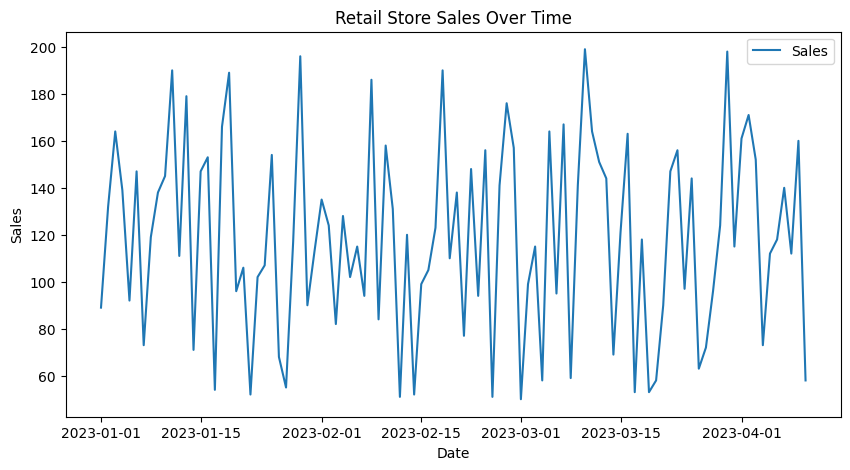

Mean Absolute Error: 49.737376286960604


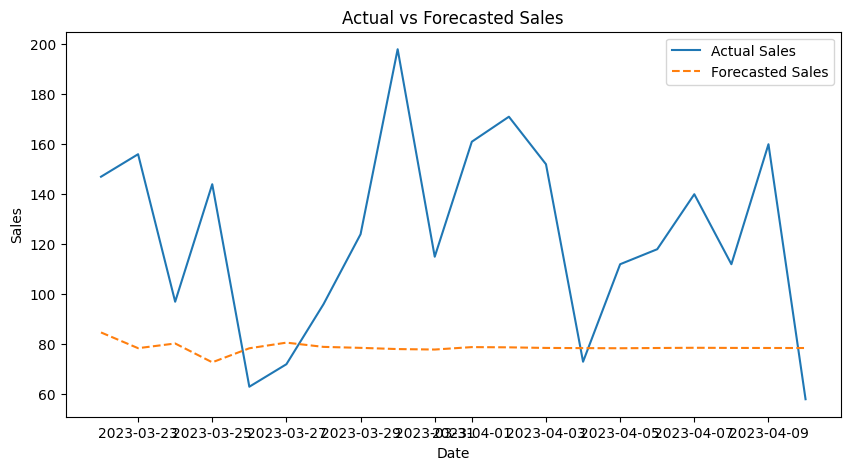

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load dataset (replace 'sales_data.csv' with your actual file)
df = pd.read_csv('/kaggle/input/sales-data/sales_data.csv', parse_dates=['Date'], index_col='Date')
df = df.resample('D').sum()  # Resample data to daily frequency

# Visualize sales data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Retail Store Sales Over Time')
plt.legend()
plt.show()

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))  # Adjust p, d, q as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate model
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

# Plot actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.show()

# Save forecasted results
forecast_df = pd.DataFrame({'Date': test.index, 'Forecasted_Sales': forecast.values})
forecast_df.to_csv('forecasted_sales.csv', index=False)
